## Brain Stroke Risk Prediction

##### Cerebrovascular diseases, like strokes, are one of the leading causes of death in the world. Patients and health care systems are both burdened with significant health and financial issues as a result. Stroke risk can be influenced by health-related behavior, which is becoming an increasingly important prevention concern. This problem can be solved by developing automated stroke prediction algorithms, which may allow early intervention and possibly save lives. Here I am going to develop some machine learning alogorithms for early stroke prediction.

##### According to the World Health Organization (WHO), stroke is the world's second biggest cause of death, accounting for around 11% of all deaths.
##### Based on input criteria such as gender, age, various diseases, and smoking status, this dataset is used to predict whether a patient is likely to have a stroke. Each row of data contains pertinent information about the patient. The dataset having a total 5110 rows and 12 columns. 
##### Columns are;
##### 1) id: unique identifier
##### 2) gender: "Male", "Female" or "Other"
##### 3) age: age of the patient
##### 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
##### 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
##### 6) ever_married: "No" or "Yes"
##### 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
##### 8) Residence_type: "Rural" or "Urban"
##### 9) avg_glucose_level: average glucose level in blood
##### 10) bmi: body mass index
##### 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
##### 12) stroke: 1 if the patient had a stroke or 0 if not


In [364]:
!pip install matplotlib

In [365]:
!pip install mglearn

In [366]:
import pandas as pd
import matplotlib.pyplot as plt

In [367]:
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
import warnings
import pickle
import os
warnings.filterwarnings('ignore')

## Read Dataset

In [368]:
data = pd.read_csv(r"healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Head and Tail of the dataset

In [369]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [370]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


## Shape Of The Dataset

In [371]:
data.shape

(5110, 12)

In [372]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [373]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Checking Null Values

In [374]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Fill Null Values

In [375]:
data['bmi'].value_counts()

bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: count, Length: 418, dtype: int64

In [376]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [377]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

In [378]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [379]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Drop Unwnated Column

In [380]:
data.drop('id',axis=1,inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Outlier Removal

In [381]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [382]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=3000, facecolor='blue', edgecolor='black')

<Figure size 60000x30000 with 0 Axes>

<Figure size 60000x30000 with 0 Axes>

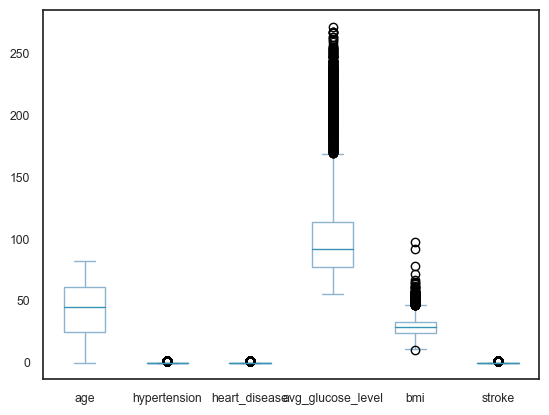

In [383]:
data.plot(kind='box')
plt.show()

## Check the Columns

In [384]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [385]:
data_cat=data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                 'smoking_status', 'stroke']]

## Unique Things in the Dataset

In [386]:
for i in data_cat.columns:
    print(data_cat[i].unique())

['Male' 'Female' 'Other']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


In [387]:
for i in data_cat.columns:
    print(data_cat[i].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
hypertension
0    4612
1     498
Name: count, dtype: int64
heart_disease
0    4834
1     276
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
stroke
0    4861
1     249
Name: count, dtype: int64


## Exploratory Data Analysis(EDA)

### Target Variable

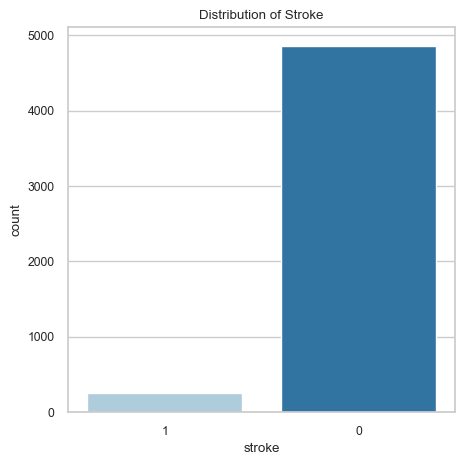

In [508]:
sns.set_style("whitegrid")
plt.figure(figsize=(5, 5))
sns.countplot(x=data['stroke'], palette = 'Paired')
plt.title('Distribution of Stroke')
plt.show()

### Visualisations for Age, Avg Glucose Level and BMI [Values which we enter]

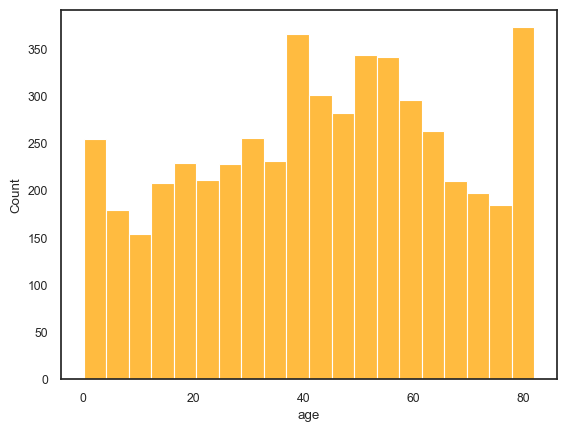

In [467]:
sns.histplot(x=data.age, linewidth=.8, color ='Orange')

plt.show()

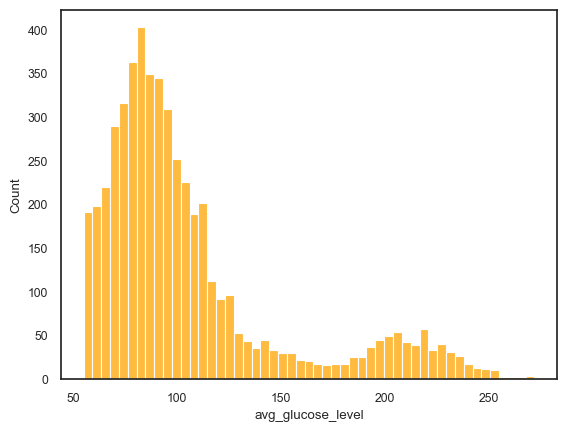

In [463]:
sns.histplot(data.avg_glucose_level, linewidth=.8, color = 'Orange')

plt.show()

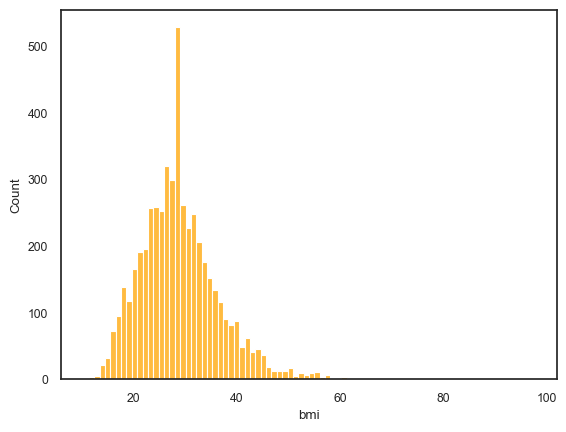

In [464]:
sns.histplot(data.bmi,linewidth=.8, color = 'Orange')

plt.show()

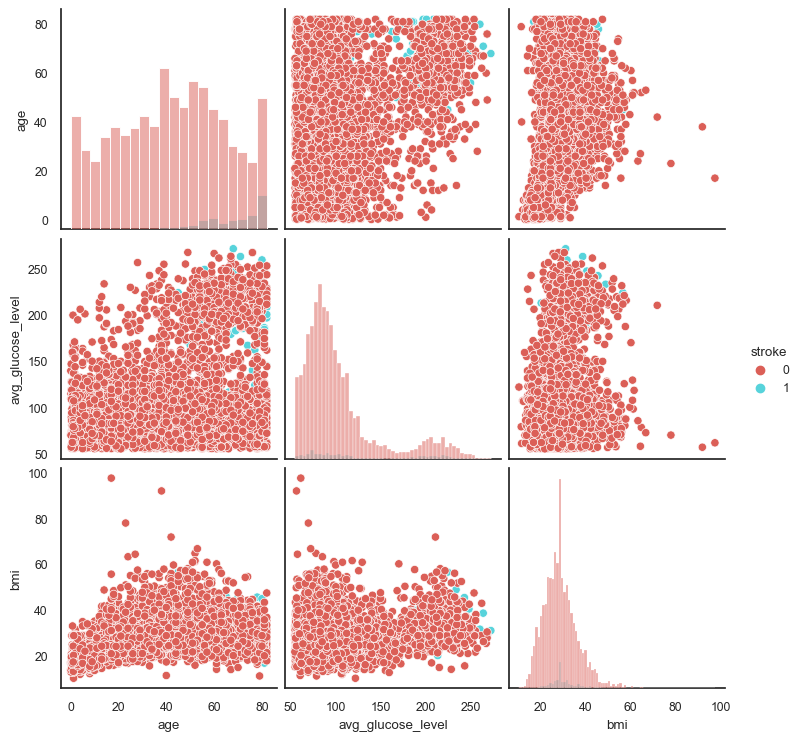

In [391]:
sns.pairplot(data.loc[:, ['age', 'avg_glucose_level', 'bmi', 'stroke']], hue="stroke", diag_kind="hist",  palette='hls')
plt.show()

### Visualisations for Gender, Hypertension, Heart Disease, Ever Married, Work Type, Residence Type and Smoking Status [Values which we select]

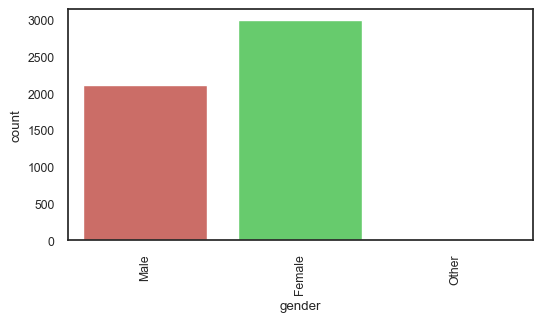

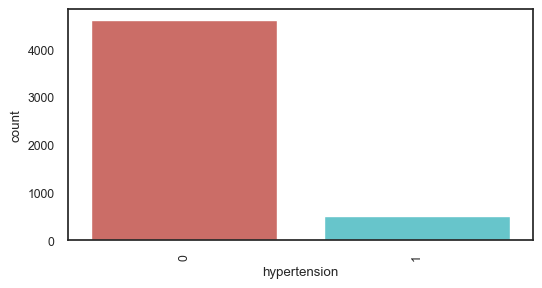

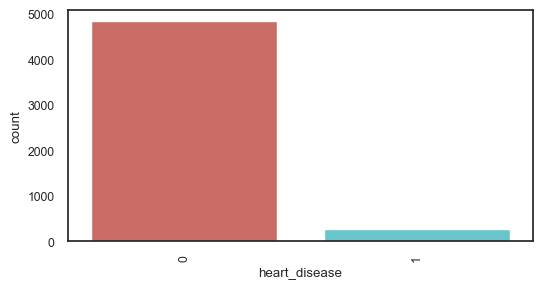

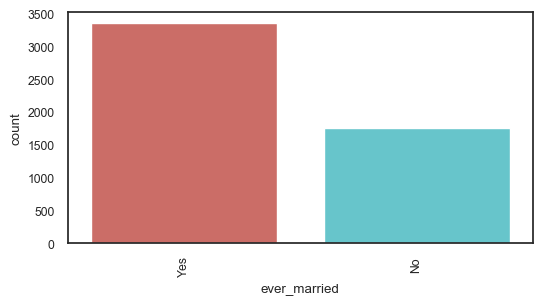

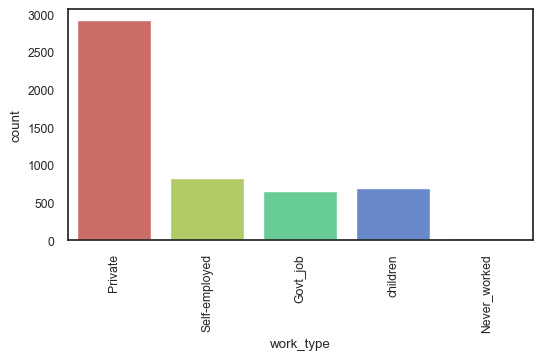

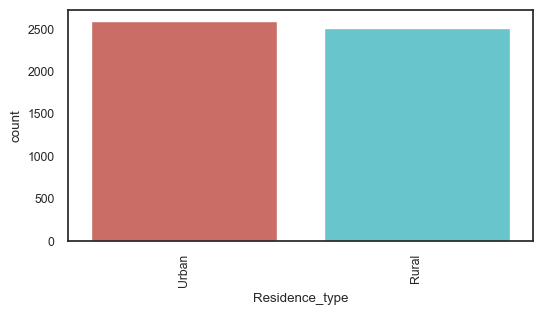

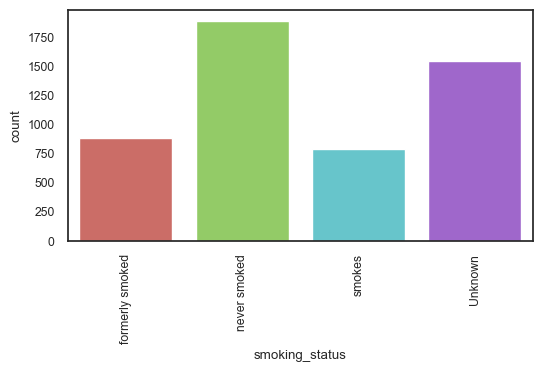

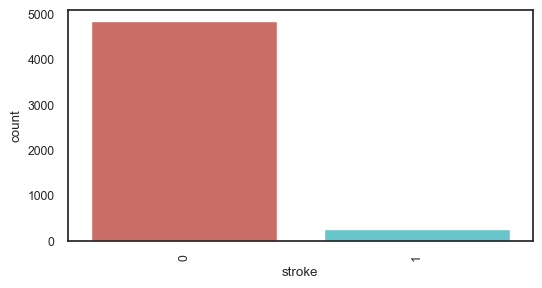

In [488]:
for i in data_cat.columns:
    plt.figure(figsize = (6,3))
    sns.countplot(x = data_cat[i], data = data_cat, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [393]:
!pip install cufflinks

In [394]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [395]:
gender = data.groupby(data['gender'])['stroke'].sum()
data_gender = pd.DataFrame({'labels': gender.index,
                   'values': gender.values
                  })
colors = ['lightpink', 'lightskyblue']
data_gender.iplot(kind='pie',labels='labels',values='values', title='Stroke among Gender Percentage', colors = colors)

In [396]:
job = data.groupby(data['work_type'])['stroke'].sum()
data_job = pd.DataFrame({'labels': job.index,
                   'values': job.values
                  })
colors2= ['palegreen','paleturquoise','thistle','moccasin']
data_job.iplot(kind='pie',labels='labels',values='values', title='Work Type Vs Stroke Percentage', colors = colors2,pull=[0.1, 0.1, 0.1, 0.2])

In [397]:
smoke = data.groupby(data['smoking_status'])['stroke'].sum()
data_smoke = pd.DataFrame({'labels': smoke.index,'values': smoke.values})
data_smoke.iplot(kind='pie',labels='labels',values='values', title='Smoking Status Vs Stroke Percentage', colors = colors2, 
            pull=[0.02, 0.02, 0.1, 0.02])

In [398]:
Residence = data.groupby(data['Residence_type'])['stroke'].sum()
data_Residence = pd.DataFrame({'labels': Residence.index,
                   'values': Residence.values
                  })
data_Residence.iplot(kind='pie',labels='labels',values='values', title='Residence Area Vs Stroke Percentage', colors = colors2, 
            pull=[0.02, 0.02],hole = 0.3)

In [399]:
Married = data.groupby(data['ever_married'])['stroke'].sum()
data_Married = pd.DataFrame({'labels': Married.index,
                   'values': Married.values
                  })
data_Married.iplot(kind='pie',labels='labels',values='values', title='Marriage Status Vs Stroke Percentage', colors = colors2, 
            pull=[0.02, 0.02],hole = 0.3)

## Bivariate Analysis

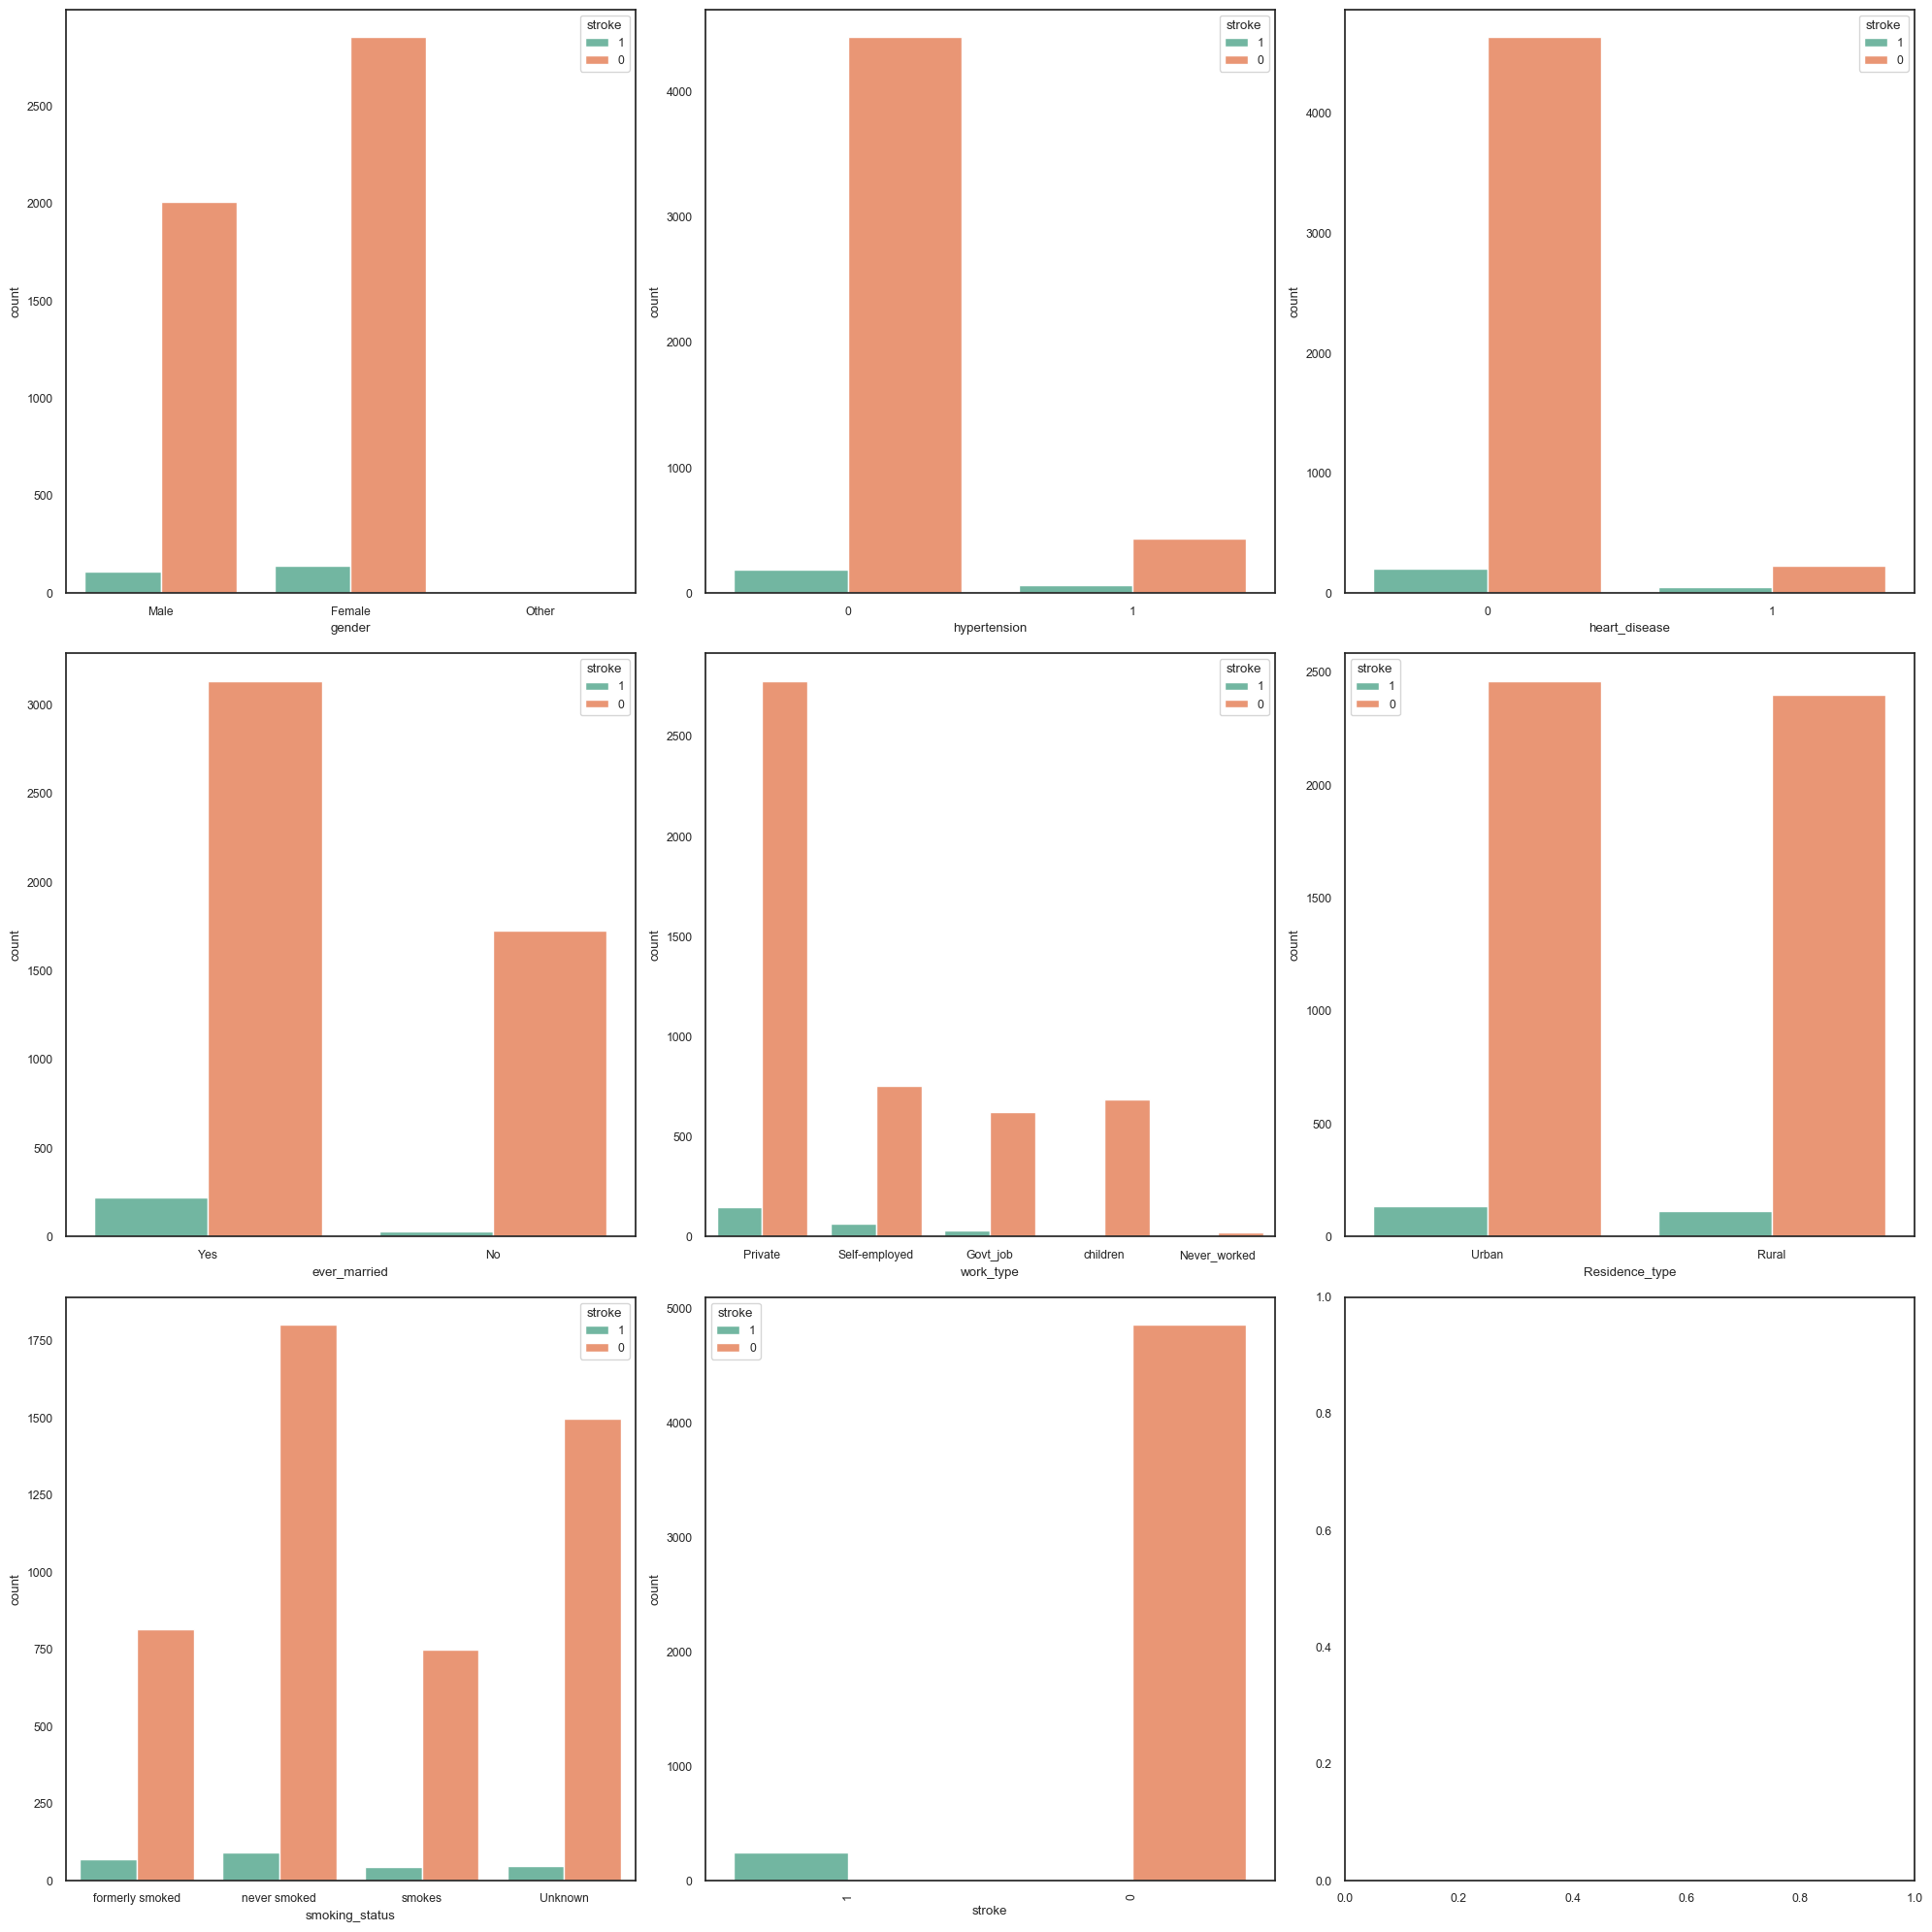

In [400]:
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
data['stroke'] = data['stroke'].astype(str)
for var, subplot in zip(data_cat, axs.flatten()):
 sns.countplot(x=data[var], hue=data['stroke'], ax=subplot, palette = 'Set2')
for label in subplot.get_xticklabels():
 label.set_rotation(90)
plt.tight_layout()
plt.show()

## Multivariate Analysis

In [401]:
from sklearn.preprocessing import OneHotEncoder

In [402]:
org_data = pd.read_csv(r"healthcare-dataset-stroke-data.csv")
org_data = org_data.drop("id",axis=1)

categorical_data = ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                 'smoking_status']

onehotencoder = OneHotEncoder(drop='first', sparse=False)
onehotencoded = onehotencoder.fit_transform(org_data[categorical_data])

onehotencoded_df = pd.DataFrame(onehotencoded, columns=onehotencoder.get_feature_names_out(categorical_data))

org_data.drop(categorical_data, axis=1, inplace=True)

dataonehotencoded = pd.concat([org_data, onehotencoded_df], axis=1)

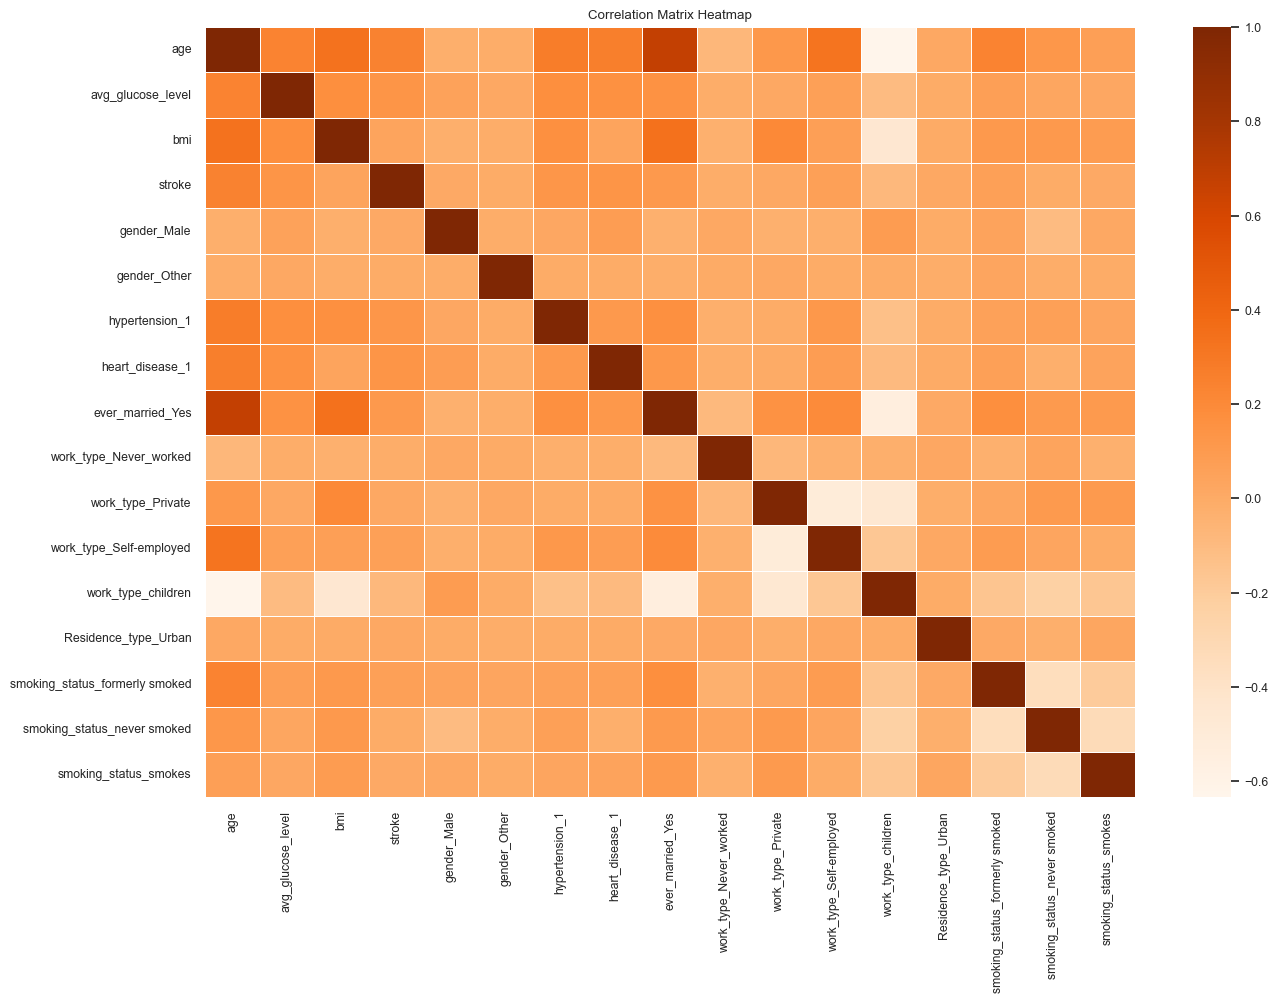

In [403]:
correlationmatrix_onehot = dataonehotencoded.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlationmatrix_onehot, annot=False, cmap='Oranges', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

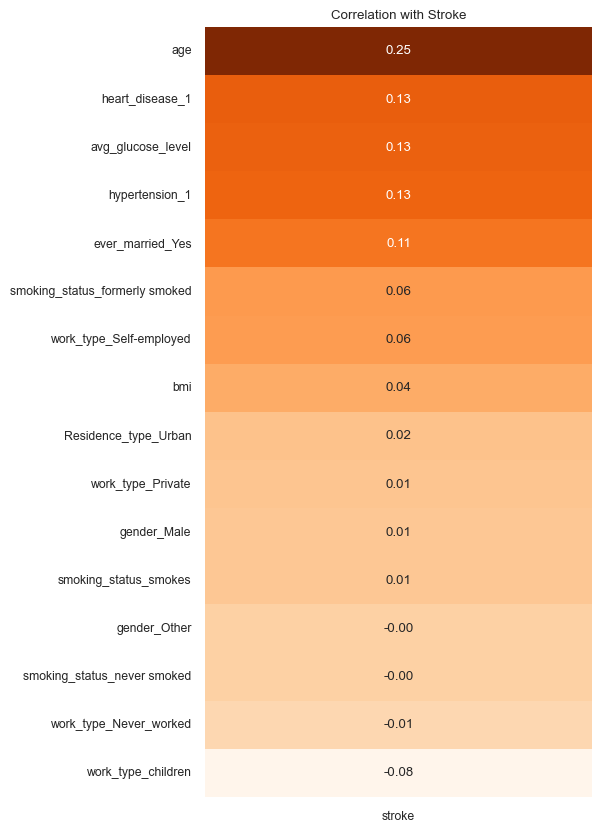

In [404]:
target_corr = correlationmatrix_onehot['stroke'].drop('stroke')
target_corr_sorted = target_corr.sort_values(ascending=False)

plt.figure(figsize=(5, 10))
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="Oranges", annot=True, fmt='.2f', cbar=False)
plt.title('Correlation with Stroke')
plt.show()

## Label Encoding

In [405]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [406]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [407]:
gender=enc.fit_transform(data['gender'])
ever_married=enc.fit_transform(data['ever_married'])
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
smoking_status=enc.fit_transform(data['smoking_status'])

In [408]:
data['gender']=gender
data['ever_married']=ever_married
data['work_type']=work_type
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status

In [409]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [410]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   object 
dtypes: float64(3), int32(5), int64(2), object(1)
memory usage: 339.5+ KB


# Splitting Data as Train and Test

In [411]:
x = data.drop('stroke',axis=1)

In [412]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [413]:
y = data['stroke']

In [414]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: object

In [415]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [416]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2285,1,49.0,0,0,1,2,0,79.64,28.893237,3
4733,1,67.0,0,0,1,2,0,83.16,25.500000,1
3905,1,78.0,0,0,1,2,1,208.85,24.400000,1
4700,1,47.0,0,0,1,2,0,110.14,30.500000,3
4939,0,59.0,0,0,1,2,1,71.08,28.100000,2
...,...,...,...,...,...,...,...,...,...,...
1180,0,62.0,0,0,1,2,0,82.57,36.000000,1
3441,0,59.0,0,0,1,3,1,90.06,28.900000,3
1344,1,47.0,0,0,1,2,0,86.37,39.200000,3
4623,1,25.0,0,0,1,0,1,166.38,23.100000,2


In [417]:
x_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
2413,0,58.00,0,0,1,2,0,100.42,39.500000,3
1141,1,57.00,0,0,1,2,0,90.06,29.800000,0
146,1,65.00,0,0,1,3,1,68.43,28.893237,1
3883,0,1.64,0,0,0,4,1,69.89,18.100000,0
1044,0,79.00,0,0,1,0,1,93.89,30.400000,2
...,...,...,...,...,...,...,...,...,...,...
2261,1,59.00,0,0,1,2,1,60.35,25.900000,1
4712,1,57.00,0,0,1,2,1,93.04,29.200000,2
4971,0,63.00,0,0,1,2,1,57.06,37.900000,2
2224,1,57.00,0,0,1,2,0,76.28,31.400000,1


In [418]:
y_train

2285    0
4733    0
3905    0
4700    0
4939    0
       ..
1180    0
3441    0
1344    0
4623    0
1289    0
Name: stroke, Length: 4088, dtype: object

In [419]:
y_test

2413    0
1141    0
146     1
3883    0
1044    0
       ..
2261    0
4712    0
4971    0
2224    0
4825    0
Name: stroke, Length: 1022, dtype: object

In [420]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000


In [421]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [422]:
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

## Save Scalar Values

In [423]:
scaler_path=os.path.join('F:\Athira\Stroke_Prediction','models\scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [424]:
x_train_std

array([[ 1.19359699,  0.2521852 , -0.33069968, ..., -0.58626884,
         0.00238781,  1.51158251],
       [ 1.19359699,  1.04686385, -0.33069968, ..., -0.50843521,
        -0.44065504, -0.35191245],
       [ 1.19359699,  1.5325008 , -0.33069968, ...,  2.27080023,
        -0.58427812, -0.35191245],
       ...,
       [ 1.19359699,  0.16388757, -0.33069968, ..., -0.43745625,
         1.34810513,  1.51158251],
       [ 1.19359699, -0.80738634, -0.33069968, ...,  1.33171097,
        -0.75401449,  0.57983503],
       [-0.83780372,  1.62079843, -0.33069968, ..., -0.74171498,
        -0.16646553,  0.57983503]])

In [425]:
x_test_std

array([[-0.83780372,  0.64952452, -0.33069968, ..., -0.12678509,
         1.38727506,  1.51158251],
       [ 1.19359699,  0.60537571, -0.33069968, ..., -0.35586361,
         0.12078063, -1.28365994],
       [ 1.19359699,  0.95856622, -0.33069968, ..., -0.83414241,
         0.00238781, -0.35191245],
       ...,
       [-0.83780372,  0.87026859, -0.33069968, ..., -1.08555387,
         1.17836876,  0.57983503],
       [ 1.19359699,  0.60537571, -0.33069968, ..., -0.66056457,
         0.32968693, -0.35191245],
       [-0.83780372, -1.29302329, -0.33069968, ..., -0.75962556,
        -1.31545016, -1.28365994]])

# Model Building

## 1. Logistic Regression

In [426]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [427]:
from sklearn.metrics import accuracy_score

In [428]:
lr.fit(x_train_std,y_train)

LogisticRegression()

In [429]:
y_pred_lr = lr.predict(x_test_std)
y_pred_lr

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [430]:
ac_lr = accuracy_score(y_test,y_pred_lr)
ac_lr

0.9383561643835616

In [431]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [432]:
cm = confusion_matrix(y_test,y_pred_lr)

In [433]:
print(cm)

[[959   1]
 [ 62   0]]


Score :  0.060665362035225046


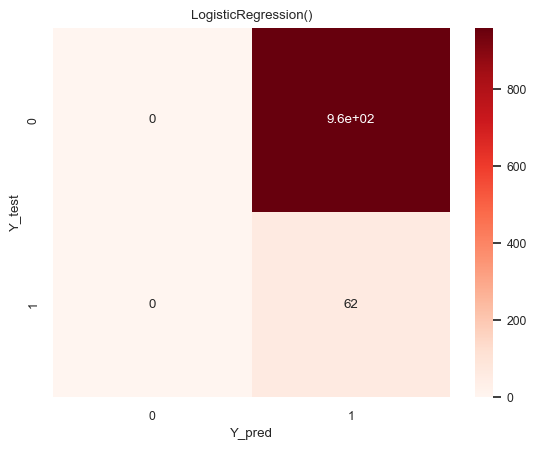

In [468]:
pred_list = [lr]

for i in pred_list:
    print("Score : ",i.score(x_test,y_test))
    y_pred_lr = i.predict(x_test)
    sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot = True, cmap="Reds")
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

## 2. Decision Tree

In [435]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [436]:
dt.fit(x_train_std,y_train)

DecisionTreeClassifier()

In [437]:
dt.feature_importances_

array([0.02517249, 0.18128016, 0.01323121, 0.02484502, 0.03041762,
       0.04191648, 0.05010702, 0.2847877 , 0.27836895, 0.06987336])

In [438]:
x_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [439]:
y_pred_dt = dt.predict(x_test_std)
y_pred_dt

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [440]:
ac_dt=accuracy_score(y_test,y_pred_dt)
ac_dt

0.8953033268101761

In [441]:
cm = confusion_matrix(y_test,y_pred_dt)
print(cm)

[[909  51]
 [ 56   6]]


Score :  0.9344422700587084


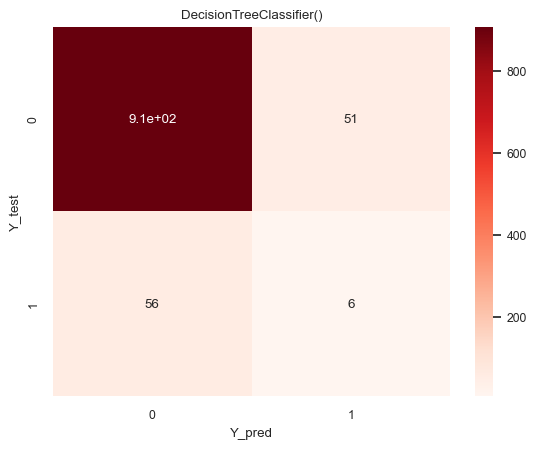

In [469]:
pred_list = [dt]

for i in pred_list:
    print("Score : ",i.score(x_test,y_test))
    y_pred = i.predict(x_test)
    sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot = True, cmap="Reds")
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

## 3. Random Forest

In [443]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [444]:
rf.fit(x_train_std,y_train)

RandomForestClassifier()

In [470]:
y_pred_rf=rf.predict(x_test_std)
y_pred_rf

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [471]:
ac_rf=accuracy_score(y_test,y_pred_rf)
ac_rf

0.9373776908023483

In [472]:
cm = confusion_matrix(y_test,y_pred_rf)
print(cm)

[[958   2]
 [ 62   0]]


Score :  0.9393346379647749


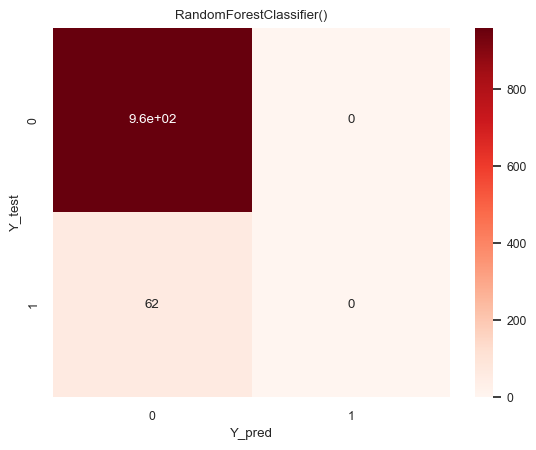

In [473]:
pred_list = [rf]

for i in pred_list:
    print("Score : ",i.score(x_test,y_test))
    y_pred_rf = i.predict(x_test)
    sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot = True, cmap="Reds")
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

## 4. K-Nearest Neighbors(KNN)

In [447]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [448]:
knn.fit(x_train_std,y_train)

KNeighborsClassifier()

In [474]:
y_pred_knn=knn.predict(x_test_std)
y_pred_knn

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [475]:
ac_knn=accuracy_score(y_test,y_pred_knn)
ac_knn

0.9344422700587084

In [476]:
cm = confusion_matrix(y_test,y_pred_knn)
print(cm)

[[955   5]
 [ 62   0]]


Score :  0.9070450097847358


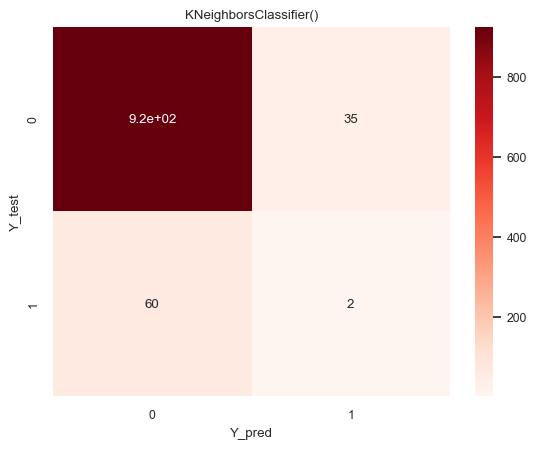

In [477]:
pred_list = [knn]

for i in pred_list:
    print("Score : ",i.score(x_test,y_test))
    y_pred_knn = i.predict(x_test)
    sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot = True, cmap="Reds")
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

## 5. Standard Vector Machine(SVM)

In [451]:
from sklearn.svm import SVC
sv=SVC()

In [452]:
sv.fit(x_train_std,y_train)

SVC()

In [478]:
y_pred_sv=sv.predict(x_test_std)
y_pred_sv

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [454]:
ac_sv=accuracy_score(y_test,y_pred_svm)
ac_sv

0.9393346379647749

In [479]:
cm = confusion_matrix(y_test,y_pred_svm)
print(cm)

[[960   0]
 [ 62   0]]


Score :  0.9393346379647749


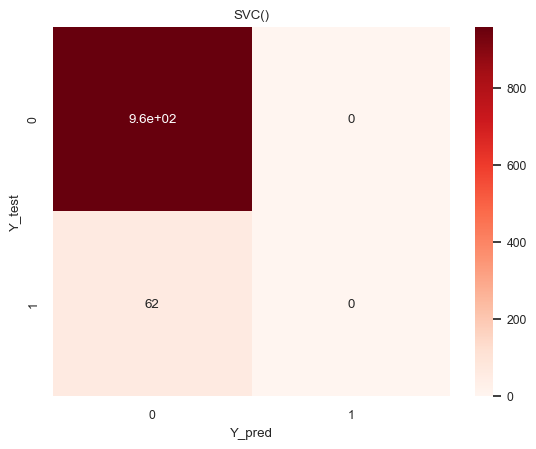

In [480]:
pred_list = [sv]

for i in pred_list:
    print("Score : ",i.score(x_test,y_test))
    y_pred_sv = i.predict(x_test)
    sns.heatmap(confusion_matrix(y_test,y_pred_sv),annot = True, cmap="Reds")
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

In [455]:
import joblib
model_path=os.path.join('F:\Athira\Stroke_Prediction','models\scaler.pkl')
joblib.dump(dt,model_path)

['F:\\Athira\\Stroke_Prediction\\models\\scaler.pkl']

## Cross Validation

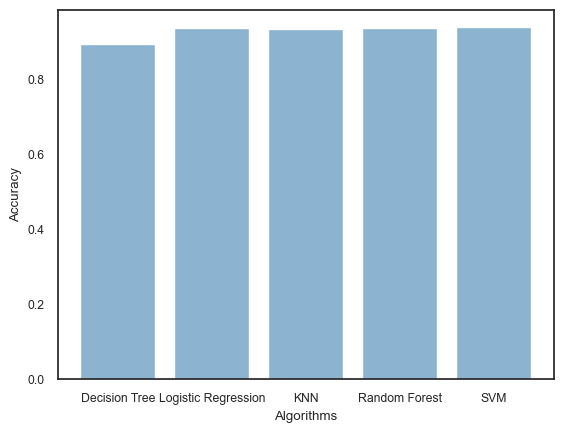

In [487]:
plt.bar(['Decision Tree','Logistic Regression','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv] )
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

##### From the above barplot we can see that all the 5 machine learning algorithms providing an accuracy more than 90%. Among them the Logistic Regression, Knn, Random Forest and SVM having highest accuracy. I should prefer SVM as the best. 